In [1]:
import numpy as np
import pandas as pd
import json

In [15]:
import requests

url = "https://free-nba.p.rapidapi.com/stats"

querystring = {"page":"0","per_page":"100"}

headers = {
    'x-rapidapi-host': "free-nba.p.rapidapi.com",
    'x-rapidapi-key': "d23b618a4cmsh1d6eb705ebd5503p1a74acjsnaf9ba0ec4cd9"
    }

response = requests.request("GET", url, headers=headers, params=querystring)

In [16]:
nba = pd.json_normalize(response.json()["data"])

In [17]:
nba.head()

,id,ast,blk,dreb,fg3_pct,fg3a,fg3m,fg_pct,fga,fgm,...,player.position,player.team_id,player.weight_pounds,team.id,team.abbreviation,team.city,team.conference,team.division,team.full_name,team.name
0,1069008,0.0,1.0,2.0,0.200,5.0,1.0,0.333,9.0,3.0,...,G,3,215.0,26,SAC,Sacramento,West,Pacific,Sacramento Kings,Kings
1,1069009,4.0,0.0,5.0,0.000,2.0,0.0,0.200,5.0,1.0,...,F,26,234.0,26,SAC,Sacramento,West,Pacific,Sacramento Kings,Kings
2,1069010,4.0,1.0,5.0,0.000,0.0,0.0,0.667,6.0,4.0,...,C,7,240.0,26,SAC,Sacramento,West,Pacific,Sacramento Kings,Kings
3,1069011,1.0,0.0,1.0,0.545,11.0,6.0,0.500,18.0,9.0,...,G,26,214.0,26,SAC,Sacramento,West,Pacific,Sacramento Kings,Kings
4,1069012,8.0,1.0,5.0,0.000,2.0,0.0,0.400,10.0,4.0,...,G,26,175.0,26,SAC,Sacramento,West,Pacific,Sacramento Kings,Kings


In [18]:
nba.columns

Index(['id', 'ast', 'blk', 'dreb', 'fg3_pct', 'fg3a', 'fg3m', 'fg_pct', 'fga',
       'fgm', 'ft_pct', 'fta', 'ftm', 'min', 'oreb', 'pf', 'pts', 'reb', 'stl',
       'turnover', 'game.id', 'game.date', 'game.home_team_id',
       'game.home_team_score', 'game.period', 'game.postseason', 'game.season',
       'game.status', 'game.time', 'game.visitor_team_id',
       'game.visitor_team_score', 'player.id', 'player.first_name',
       'player.height_feet', 'player.height_inches', 'player.last_name',
       'player.position', 'player.team_id', 'player.weight_pounds', 'team.id',
       'team.abbreviation', 'team.city', 'team.conference', 'team.division',
       'team.full_name', 'team.name'],
      dtype='object')

In [19]:
nba.shape

(100, 46)

In [21]:
for pagenum in range(1,5):
    querystring["page"] = str(pagenum)
    response = requests.request("GET", url, headers=headers, params=querystring)
    pageframe = pd.json_normalize(response.json()["data"])
    nba = pd.concat([nba, pageframe])

In [22]:
nba.shape

(500, 46)

In [42]:
teams = nba.groupby("team.full_name").sum()

In [44]:
teams["fg3_total_pct"] = teams["fg3m"] / teams["fg3a"]

In [46]:
teams[["fg3a", "fg3m", "fg3_total_pct"]]

,fg3a,fg3m,fg3_total_pct
team.full_name,,,
Boston Celtics,38.0,17.0,0.447368
Brooklyn Nets,46.0,19.0,0.413043
Charlotte Hornets,76.0,22.0,0.289474
Chicago Bulls,28.0,10.0,0.357143
Cleveland Cavaliers,53.0,17.0,0.320755
Dallas Mavericks,37.0,9.0,0.243243
Denver Nuggets,77.0,35.0,0.454545
Detroit Pistons,33.0,13.0,0.393939
Golden State Warriors,37.0,9.0,0.243243


In [49]:
#How many games does your data set actually represent?
nba["game.id"].nunique()

22

In [55]:
#Who are the top five guards by field goal percent?
nba[nba["player.position"] == "G"].groupby("player.id").mean()["fg_pct"].sort_values(ascending=False).head()

player.id
292    1.000
487    0.800
420    0.778
473    0.750
461    0.714
Name: fg_pct, dtype: float64

In [62]:
games = nba.groupby("game.id").mean()[['game.home_team_id',
       'game.home_team_score', 'game.period', 'game.postseason', 'game.season', 'game.visitor_team_id',
       'game.visitor_team_score',]]

In [65]:
games["home_team_win"] =  games["game.home_team_score"] > games["game.visitor_team_score"]

In [69]:
#Which team won most home games?
games[games["home_team_win"] == True]["game.home_team_id"].value_counts()

8.0     2
25.0    2
12.0    1
29.0    1
9.0     1
2.0     1
30.0    1
28.0    1
4.0     1
15.0    1
20.0    1
22.0    1
10.0    1
Name: game.home_team_id, dtype: int64

In [70]:
#Which team won most away games?
games[games["home_team_win"] == False]["game.visitor_team_id"].value_counts()

21.0    1
3.0     1
10.0    1
27.0    1
14.0    1
23.0    1
17.0    1
Name: game.visitor_team_id, dtype: int64

In [74]:

nba[(nba["player.id"] == 49) | (nba["player.id"] == 415)]

,id,ast,blk,dreb,fg3_pct,fg3a,fg3m,fg_pct,fga,fgm,...,player.team_id,player.weight_pounds,team.id,team.abbreviation,team.city,team.conference,team.division,team.full_name,team.name,game.net_score
0,1069008,0.0,1.0,2.0,0.2,5.0,1.0,0.333,9.0,3.0,...,3,215.0,26,SAC,Sacramento,West,Pacific,Sacramento Kings,Kings,19
1,1069009,4.0,0.0,5.0,0.0,2.0,0.0,0.200,5.0,1.0,...,26,234.0,26,SAC,Sacramento,West,Pacific,Sacramento Kings,Kings,19
0,1069008,0.0,1.0,2.0,0.2,5.0,1.0,0.333,9.0,3.0,...,3,215.0,26,SAC,Sacramento,West,Pacific,Sacramento Kings,Kings,19
1,1069009,4.0,0.0,5.0,0.0,2.0,0.0,0.200,5.0,1.0,...,26,234.0,26,SAC,Sacramento,West,Pacific,Sacramento Kings,Kings,19


In [85]:
#players 3 and 409
player_stats = nba[(nba["player.id"] == 3) | (nba["player.id"] == 409)].groupby("player.id").mean()[["fg_pct", "fg3_pct", "blk", "stl"]]

In [87]:
import matplotlib.pyplot as plt

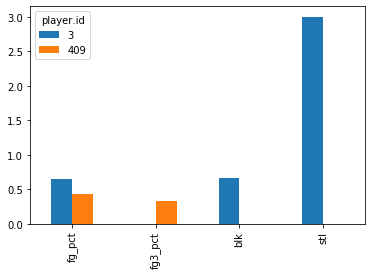

In [89]:
#Compare your two favorite players:
#show their field goal percent, three point field goal percent, blocks and steals
#Use a suitable visualization to compare these stats
player_stats.transpose().plot(kind="bar")

In [94]:
#Who is the taller player? Does the taller play have more blocks?
nba[(nba["player.id"] == 3) | (nba["player.id"] == 409)].groupby("player.id").mean()["player.height_feet"]
#the taller player has more blocks

player.id
3      7.0
409    6.0
Name: player.height_feet, dtype: float64